# <font color='navy'> Tarea PCA
<font color='navy'> Luis Márquez | 744489

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from xgboost import XGBRegressor
from sklearn.cluster import KMeans
from sklearn.metrics import r2_score
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

## <font color='royalblue'> Datos

In [2]:
data = pd.read_csv('hitters.csv')
data = pd.get_dummies(data, columns=['League','Division','NewLeague'])
target = 'Salary'
data = data[data['Salary'].notnull()]
data.reset_index(drop=True, inplace=True)
data

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,...,PutOuts,Assists,Errors,Salary,League_A,League_N,Division_E,Division_W,NewLeague_A,NewLeague_N
0,315,81,7,24,38,39,14,3449,835,69,...,632,43,10,475.0,False,True,False,True,False,True
1,479,130,18,66,72,76,3,1624,457,63,...,880,82,14,480.0,True,False,False,True,True,False
2,496,141,20,65,78,37,11,5628,1575,225,...,200,11,3,500.0,False,True,True,False,False,True
3,321,87,10,39,42,30,2,396,101,12,...,805,40,4,91.5,False,True,True,False,False,True
4,594,169,4,74,51,35,11,4408,1133,19,...,282,421,25,750.0,True,False,False,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
258,497,127,7,65,48,37,5,2703,806,32,...,325,9,3,700.0,False,True,True,False,False,True
259,492,136,5,76,50,94,12,5511,1511,39,...,313,381,20,875.0,True,False,True,False,True,False
260,475,126,3,61,43,52,6,1700,433,7,...,37,113,7,385.0,True,False,False,True,True,False
261,573,144,9,85,60,78,8,3198,857,97,...,1314,131,12,960.0,True,False,True,False,True,False


In [3]:
X = data.copy()
X = X.drop(columns=[target])
y = data[target]

## <font color='royalblue'> ¿Cuál es la varianza explicada de las primeras 3 componentes?

In [4]:
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA())
])
pipeline.fit(X)

Pipeline(steps=[('scaler', StandardScaler()), ('pca', PCA())])

In [5]:
objeto_pca = pipeline.named_steps['pca']
X_pca = pipeline.transform(X)
X_componentes = pd.DataFrame(X_pca, columns=[f'PCA {i+1}' for i in range(X_pca.shape[1])])
X_componentes.head()

,PCA 1,PCA 2,PCA 3,PCA 4,PCA 5,PCA 6,PCA 7,PCA 8,PCA 9,PCA 10,...,PCA 13,PCA 14,PCA 15,PCA 16,PCA 17,PCA 18,PCA 19,PCA 20,PCA 21,PCA 22
0,-0.282823,-2.650655,-0.962828,-1.328333,-0.409792,1.391088,-0.117568,0.091295,0.041000,-0.282530,...,0.481319,0.387567,0.067692,0.144861,-0.080354,0.038152,-0.019248,3.980602e-17,9.564450e-16,3.629763e-16
1,0.582642,2.791535,0.299486,-1.519606,-0.694956,1.902715,0.247697,1.183705,0.046066,-0.399892,...,-0.403330,-0.019805,0.066259,0.160979,-0.044363,0.014832,-0.003393,1.147780e-16,-1.432547e-16,1.040075e-15
2,3.263233,-1.801441,-1.663563,1.340556,-1.203074,-1.010101,-0.904411,-0.831769,-0.059186,0.220367,...,-0.023744,-0.377727,0.230462,0.011952,0.218379,0.037825,-0.066506,-1.371358e-16,1.345023e-15,9.180878e-16
3,-2.703012,-0.481545,-1.718358,1.552541,-1.586995,1.558802,-0.208833,-0.212553,0.131257,0.392416,...,-0.144997,0.028571,0.041744,0.053038,0.044534,0.010358,-0.013581,8.490883e-17,4.568446e-16,1.409317e-16
4,1.166912,1.852599,0.199107,-1.821658,3.619792,0.454013,0.053134,-0.997806,-0.253163,-0.614440,...,0.305880,-0.091051,0.044181,0.012328,0.050543,0.126037,-0.071038,-1.072666e-16,1.633102e-15,2.150298e-15


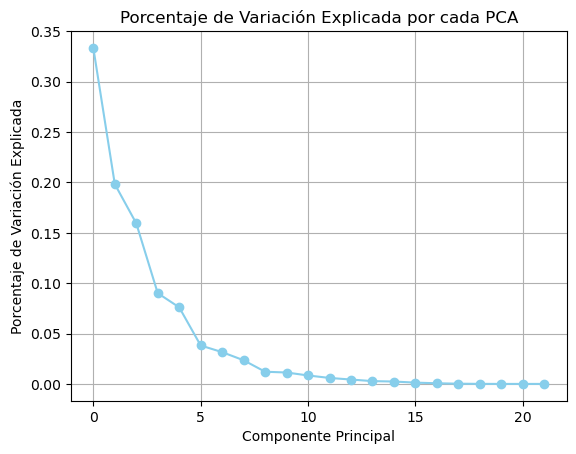

In [6]:
plt.plot(objeto_pca.explained_variance_ratio_, marker='o', color = 'skyblue')
plt.title('Porcentaje de Variación Explicada por cada PCA')
plt.xlabel('Componente Principal')
plt.ylabel('Porcentaje de Variación Explicada')
plt.grid()
plt.show()

In [7]:
var_1 = objeto_pca.explained_variance_ratio_[0]
var_2 = objeto_pca.explained_variance_ratio_[1]
var_3 = objeto_pca.explained_variance_ratio_[2]

print(f'Varianza explicada por el primer componente: {var_1:.4f}')
print(f'Varianza explicada por el segundo componente: {var_2:4f}')
print(f'Varianza explicada por el tercer componente: {var_3:.4f}')

Varianza explicada por el primer componente: 0.3335
Varianza explicada por el segundo componente: 0.198330
Varianza explicada por el tercer componente: 0.1594


## <font color='royalblue'> Gráfica las primeras dos componentes y aplica un KMeans

### <font color='steelblue'> Scatterplot de PCA

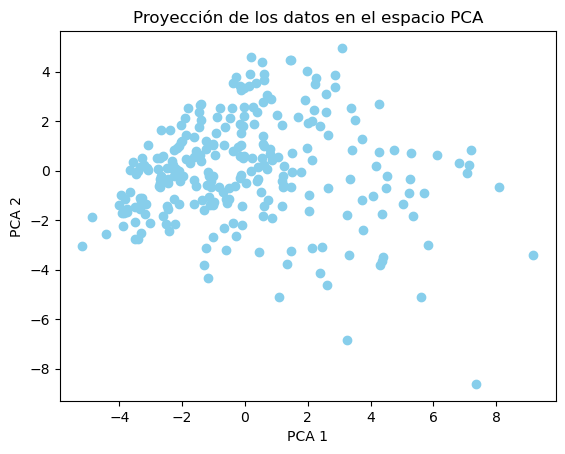

In [8]:
plt.scatter(X_componentes['PCA 1'], X_componentes['PCA 2'], c='skyblue')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('Proyección de los datos en el espacio PCA')
plt.show()

### <font color='steelblue'> Scatterplot de PCA con KMeans

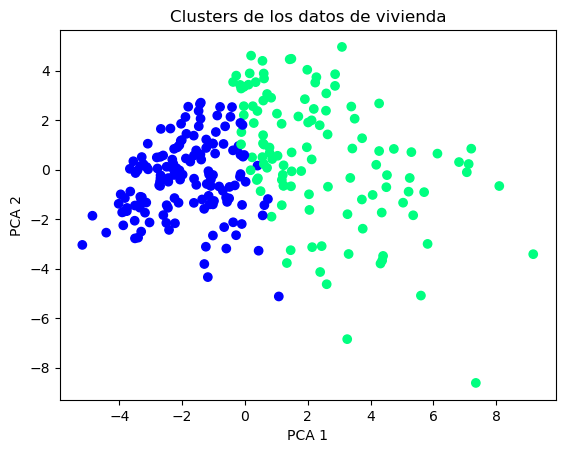

In [9]:
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('kmeans', KMeans(n_clusters=2))
])
pipeline.fit(X)

X_componentes['cluster'] = pipeline.predict(X) + 1

plt.scatter(X_componentes['PCA 1'], X_componentes['PCA 2'], c=X_componentes['cluster'], cmap='winter')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('Clusters de los datos de vivienda')
plt.show()

## <font color='royalblue'> Crea un modelo boosting (Catboost, xgboost o lightgbm, el que quieras)

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
XC_train = X_componentes.loc[X_train.index]
XC_test = X_componentes.loc[X_test.index]
XC_train = XC_train.drop(columns=['cluster'])
XC_test = XC_test.drop(columns=['cluster'])

### <font color='steelblue'> A) todas las variables


In [11]:
model = XGBRegressor(
    n_estimators=10_000,
    max_depth=5,
    learning_rate=0.01,
    reg_lambda=0.05,
    subsample=0.5,
    colsample_bytree=0.8,
    eval_metric='rmse',
    early_stopping_rounds=1000,
)

model.fit(X_train, y_train,
          eval_set=[(X_train, y_train), (X_test, y_test)],
          verbose=500)

[0]	validation_0-rmse:452.64888	validation_1-rmse:424.92958
[500]	validation_0-rmse:62.20785	validation_1-rmse:284.99294
[1000]	validation_0-rmse:21.81113	validation_1-rmse:282.70091
[1500]	validation_0-rmse:8.04082	validation_1-rmse:282.22109
[2000]	validation_0-rmse:3.05545	validation_1-rmse:281.91098
[2500]	validation_0-rmse:1.18464	validation_1-rmse:281.85553
[3000]	validation_0-rmse:0.46682	validation_1-rmse:281.84249
[3500]	validation_0-rmse:0.19106	validation_1-rmse:281.83361
[4000]	validation_0-rmse:0.07846	validation_1-rmse:281.83412
[4500]	validation_0-rmse:0.03196	validation_1-rmse:281.83262
[4563]	validation_0-rmse:0.02874	validation_1-rmse:281.83233


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, device=None, early_stopping_rounds=1000,
             enable_categorical=False, eval_metric='rmse', feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.01, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=5,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=10000,
             n_jobs=None, num_parallel_tree=None, ...)

In [12]:
predicciones = model.predict(X_test)
r2 = r2_score(y_test, predicciones)
print(f'R2: {r2:.4f}')

R2: 0.5609


### <font color='steelblue'> B) Todas las componentes

In [13]:
model = XGBRegressor(
    n_estimators=10_000,
    max_depth=5,
    learning_rate=0.01,
    reg_lambda=0.05,
    subsample=0.5,
    colsample_bytree=0.8,
    eval_metric='rmse',
    early_stopping_rounds=1000,
)

model.fit(XC_train, y_train,
          eval_set=[(XC_train, y_train), (XC_test, y_test)],
          verbose=500)

[0]	validation_0-rmse:454.29744	validation_1-rmse:426.46303
[500]	validation_0-rmse:69.26105	validation_1-rmse:367.04217
[1000]	validation_0-rmse:20.19775	validation_1-rmse:362.95792
[1500]	validation_0-rmse:6.22949	validation_1-rmse:362.17159
[2000]	validation_0-rmse:1.95114	validation_1-rmse:362.07094
[2500]	validation_0-rmse:0.62017	validation_1-rmse:362.02754
[3000]	validation_0-rmse:0.19268	validation_1-rmse:362.01211
[3500]	validation_0-rmse:0.06101	validation_1-rmse:362.01273
[3826]	validation_0-rmse:0.02803	validation_1-rmse:362.01329


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, device=None, early_stopping_rounds=1000,
             enable_categorical=False, eval_metric='rmse', feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.01, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=5,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=10000,
             n_jobs=None, num_parallel_tree=None, ...)

In [14]:
predicciones = model.predict(XC_test)
r2 = r2_score(y_test, predicciones)
print(f'R2: {r2:.4f}')

R2: 0.2755


### <font color='steelblue'> C) las tres primeras componentes

In [15]:
XC3_train = XC_train.iloc[:, :3]
XC3_test = XC_test.iloc[:, :3]

In [16]:
model = XGBRegressor(
    n_estimators=10_000,
    max_depth=5,
    learning_rate=0.01,
    reg_lambda=0.05,
    subsample=0.5,
    colsample_bytree=0.8,
    eval_metric='rmse',
    early_stopping_rounds=1000,
)

model.fit(XC3_train, y_train,
          eval_set=[(XC3_train, y_train), (XC3_test, y_test)],
          verbose=500)

[0]	validation_0-rmse:453.14324	validation_1-rmse:425.11826


[500]	validation_0-rmse:106.08120	validation_1-rmse:344.24937
[1000]	validation_0-rmse:56.53004	validation_1-rmse:341.74466
[1500]	validation_0-rmse:31.48605	validation_1-rmse:341.88113
[2000]	validation_0-rmse:17.84075	validation_1-rmse:342.66791
[2033]	validation_0-rmse:17.14970	validation_1-rmse:342.73450


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, device=None, early_stopping_rounds=1000,
             enable_categorical=False, eval_metric='rmse', feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.01, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=5,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=10000,
             n_jobs=None, num_parallel_tree=None, ...)

In [17]:
predicciones = model.predict(XC3_test)
r2 = r2_score(y_test, predicciones)
print(f'R2: {r2:.4f}')

R2: 0.3556


## <font color='royalblue'> ¿Qué puedes concluir?